<a href="https://colab.research.google.com/github/Venkateshwarlu978/Venkateshwarlu978/blob/main/Multiple_linear_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
#dropping unncessary columns
df.drop(columns=["Unnamed: 0","month","year"],axis=1,inplace=True) #inplace=true ,it changes the main dataframe

In [11]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [12]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [14]:
df.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


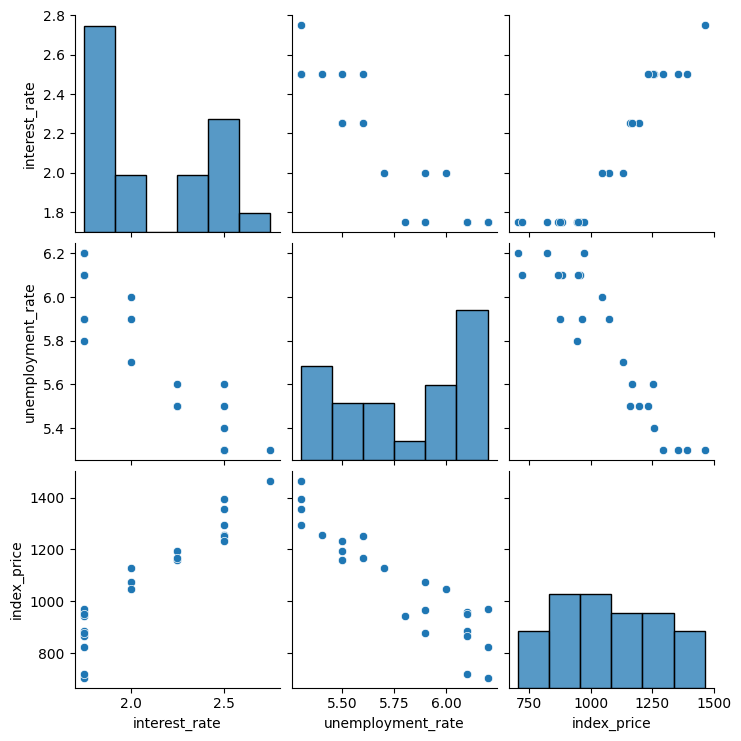

In [31]:
import seaborn as sns
sns.pairplot(df)

In [32]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

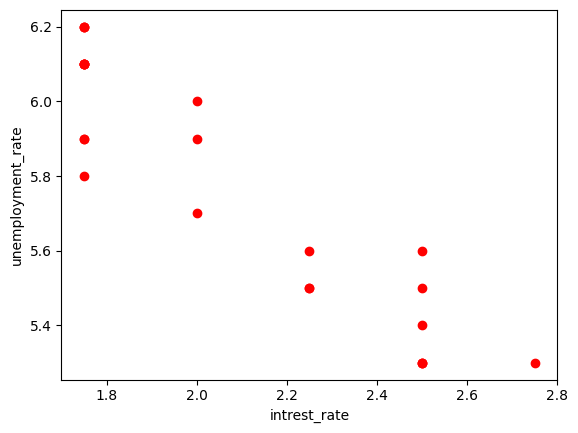

In [33]:
#visuallize the datapoints
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("intrest_rate")
plt.ylabel("unemployment_rate")

In [35]:
#getting independent and dependent features
X=df[['interest_rate','unemployment_rate']]#also we can use iloc,which takes all the columns expect last by iloc[:,:-1]
y=df['index_price']

In [36]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [37]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [38]:
#train test split
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

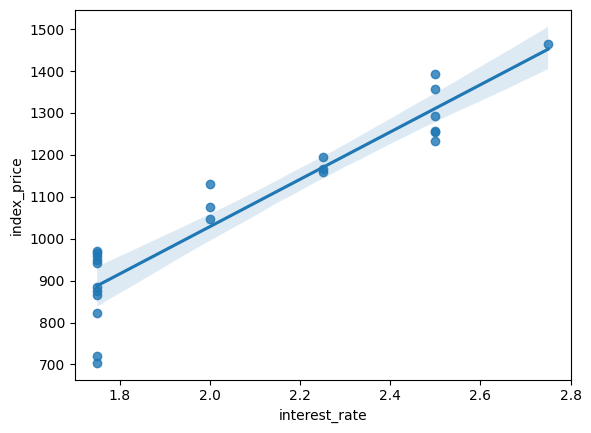

In [47]:

sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

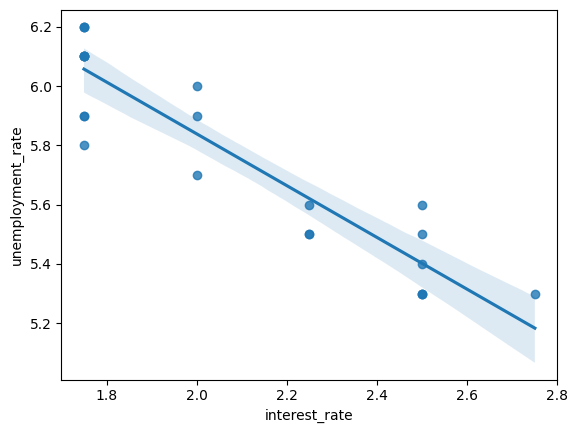

In [48]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [50]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [51]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [52]:
regression.fit(X_train,y_train)

LinearRegression()

In [54]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)


In [55]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [56]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [57]:
##prediction
y_pred=regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

73.80444932337097
8108.567426306604
90.04758423359621


In [62]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7591371539010257


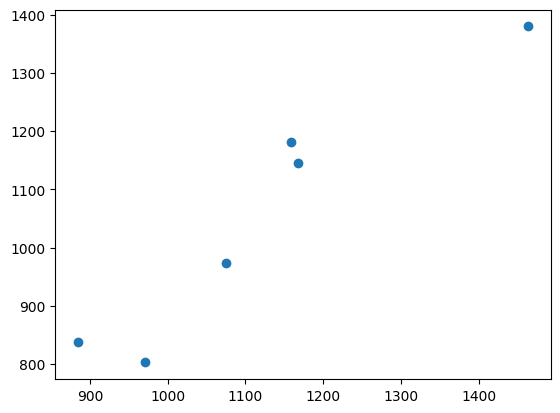

In [63]:
##Asumptions
plt.scatter(y_test,y_pred)

In [64]:
residuals=y_test-y_pred #errors
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


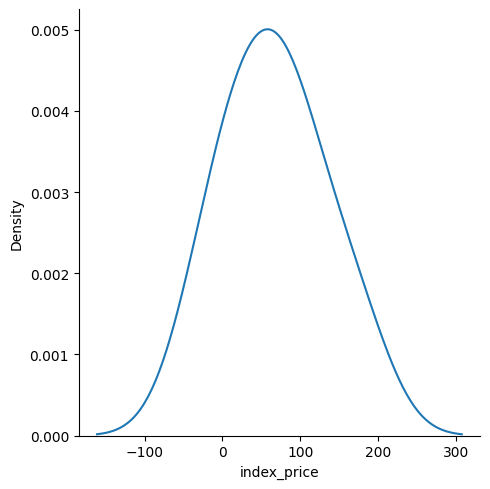

In [67]:
#plot for residuals
sns.displot(residuals,kind='kde')

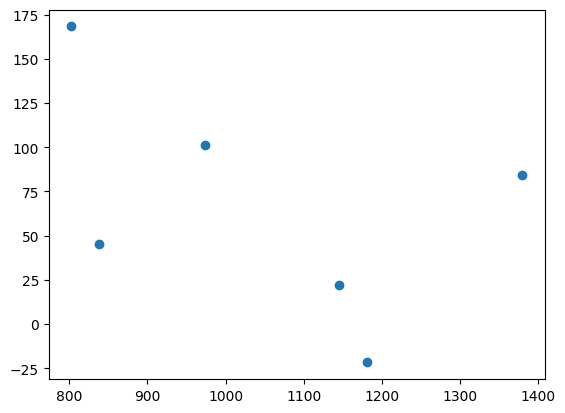

In [68]:
#scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [69]:
#OLS linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 14 Oct 2025   Prob (F-statistic):                       0.754
Time:                        09:42:25   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
print(regression.coef_)

[  88.27275507 -116.25716066]
